# Exercise Steps 

1. Select a dataset, Make sure it's not too dirty, as this case study is about storytelling, not cleaning.
2. Pick your audience: executive, technical, or non-technical; and adjust your tone accordingly. 
3. Take a look at the data: explore it. 
4. Think of a narrative, and pursue it. 

In your quest, you might need to ask a bunch of other questions, such as: 
- Can I count something interesting? 
- Can I find trends (e.g. high, low, increasing, decreasing, anomalies)? 
- Can I make a bar plot or a histogram? 
- Can I compare two related quantities?
- Can I make a scatterplot? 
- Can I make a time-series plot? 
- Looking at the plots, what are some insights I can make? 
- Can I see any correlations? 
- Is there a hypothesis I can - and should - investigate further? 
- What other questions are the insights leading me to ask? 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
import numpy as np

In [2]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

## 1. Select a Dataset

In [3]:
df = pd.read_csv('./data/adult.csv')

#### About Dataset:

This dataset comes from the UCI repository of machine learning databases. The task is to predict if an individual's annual income excceds $50,000 based on census data. More details are available in the original UCI documentation

**Fields:** (from https://www.kaggle.com/datasets/wenruliu/adult-income-dataset):

- The dataset contains 16 columns
- Target fieled: Income
-- The income is divide into two classes: <=50K and >50K
- Number of attributes: 14
-- These are the demographics and other features to describe a person

We can explore the possibility of predicting income level based on the individual’s personal information.

**Acknowledgements:**

This dataset named “adult” is found in the UCI machine learning repository
http://www.cs.toronto.edu/~delve/data/adult/desc.html

The detailed description on the dataset can be found in the original UCI documentation
http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html

#### Feature Description
***(from: https://www.kaggle.com/code/alokevil/simple-eda-for-beginners)***

**1. Categorical Attributes**

***workclass***: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
> *Individual work category*

***education***: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
> Individual's highest education degree

***marital-status***: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
> Individual marital status

***occupation***: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
> Individual's occupation

***relationship***: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
> Individual's relation in a family

***race***: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
> Race of Individual

***sex***: Female, Male.

***native-country***: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
> Individual's native country


**2. Continuous Attributes**

***age***: continuous.
> Age of an individual

***fnlwgt***: final weight, continuous.
> The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau.

***capital-gain***: continuous.

***capital-loss***: continuous.

***hours-per-week***: continuous.
> Individual's working hour per week






## 2. Pick your Audience

I will be addressing the technical audience in this project. I will inspect the data to start off.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [4]:
df.shape

(48842, 15)

In [7]:
df.drop_duplicates(inplace=True)
df.shape

(48790, 15)

In [8]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
age,25,38,28,44,18,34,29,63,24,55
workclass,Private,Private,Local-gov,Private,?,Private,?,Self-emp-not-inc,Private,Private
fnlwgt,226802,89814,336951,160323,103497,198693,227026,104626,369667,104996
education,11th,HS-grad,Assoc-acdm,Some-college,Some-college,10th,HS-grad,Prof-school,Some-college,7th-8th
educational-num,7,9,12,10,10,6,9,15,10,4
marital-status,Never-married,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Never-married,Never-married,Never-married,Married-civ-spouse,Never-married,Married-civ-spouse
occupation,Machine-op-inspct,Farming-fishing,Protective-serv,Machine-op-inspct,?,Other-service,?,Prof-specialty,Other-service,Craft-repair
relationship,Own-child,Husband,Husband,Husband,Own-child,Not-in-family,Unmarried,Husband,Unmarried,Husband
race,Black,White,White,Black,White,White,Black,White,White,White
gender,Male,Male,Male,Male,Female,Male,Male,Male,Female,Male


There doesn't seem to be any null values in the dataset, but there are entries that contain a `?`. I'll take a closer look.

In [9]:
for col in df.columns:
    if '?' in df[col].unique().astype(str):
        print(col)

workclass
occupation
native-country


In [10]:
df[df.workclass == '?']

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,?,299831,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,35,United-States,<=50K
22,72,?,132015,7th-8th,4,Divorced,?,Not-in-family,White,Female,0,0,6,United-States,<=50K
35,65,?,191846,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
48812,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
48820,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
48822,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


It seems the entries in the `workclass` column are '?' when the `occupation` column entires are '?'.

Let's verify this:

In [11]:
df[df.workclass == '?'].shape

(2795, 15)

In [12]:
df[(df.workclass == '?') & (df.occupation == '?')].shape

(2795, 15)

They are indeed the same entries. 

In [13]:
round(100* (2799 / len(df)),2)

5.74

They represent just under 6% of the dataset

In [14]:
df[df['native-country'] == '?']

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
19,40,Private,85019,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,?,>50K
65,41,Private,109912,Bachelors,13,Never-married,Other-service,Not-in-family,White,Female,0,0,40,?,<=50K
83,44,Self-emp-inc,223881,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,50,?,>50K
188,34,State-gov,513100,Bachelors,13,Married-spouse-absent,Farming-fishing,Not-in-family,Black,Male,0,0,40,?,<=50K
253,42,Federal-gov,177937,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48730,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,?,>50K
48750,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K
48773,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,?,<=50K
48791,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,?,>50K


In [15]:
round( 100* 857/len(df),2)

1.76

Since the missing entries for `workclass` & `occupation` represent under 6% of the total dataset, we could drop them or impute them with the mode. Similarly, the entries for `native-country` are under 2%. I will opt for using the mode to fill the entries.

In [16]:
# first I'll replace the `?` entries with nan then I'll fill the na values with the mode.
df[df=='?'] = np.nan

In [17]:
for col in ['workclass', 'occupation', 'native-country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

## 3. Exploring

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48790.0,38.652798,13.708493,17.0,28.0,37.0,48.00,90.0
fnlwgt,48790.0,189668.999365,105617.231232,12285.0,117555.0,178138.5,237606.25,1490400.0
educational-num,48790.0,10.078807,2.570046,1.0,9.0,10.0,12.00,16.0
capital-gain,48790.0,1080.217688,7455.905921,0.0,0.0,0.0,0.00,99999.0
capital-loss,48790.0,87.595573,403.209129,0.0,0.0,0.0,0.00,4356.0
hours-per-week,48790.0,40.425886,12.392729,1.0,40.0,40.0,45.00,99.0


- The youngest and oldest ages in the dataframe are 17 and 90 respectively.
- The least educated and most educated leves are 1 : 'Preschool' and 16: 'Doctorate'
- The least and most amount of hours worked per week are ~ 12 and 99

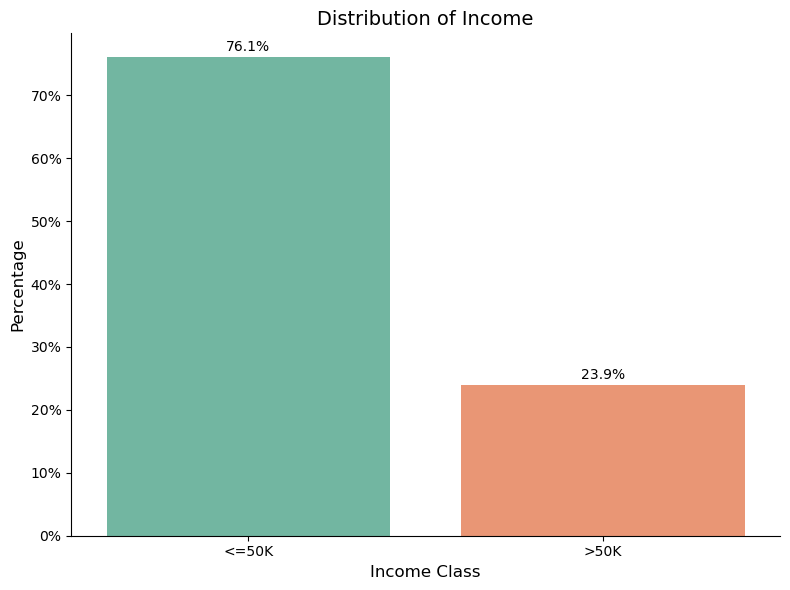

There are 3.2 times as many individuals making <=50K as there are making >50K.


In [20]:
from matplotlib.ticker import PercentFormatter
income_percentage = df['income'].value_counts(normalize=True) * 100
percent_less_50k = income_percentage['<=50K']
percent_greater_50k = income_percentage['>50K']

plt.figure(figsize=(8, 6))
sns.barplot(x=income_percentage.index, y=income_percentage.values, palette='Set2')

plt.xlabel('Income Class', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.title('Distribution of Income', fontsize=14)

# Adding percentage labels on top of each bar
for i, v in enumerate(income_percentage.values):
    plt.text(i, v + 1, f'{v:.1f}%', color='black', ha='center', fontsize=10)

plt.gca().yaxis.set_major_formatter(PercentFormatter())
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine()

plt.tight_layout()
plt.show()

ratio = percent_less_50k / percent_greater_50k
print(f"There are {ratio:.1f} times as many individuals making <=50K as there are making >50K.")

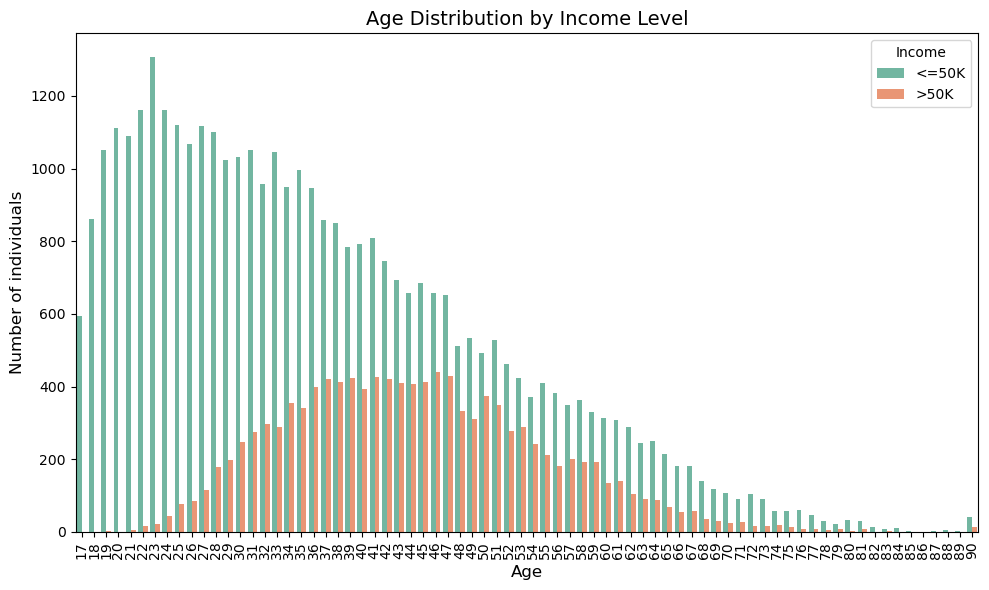

In [19]:
# Plot the age distribution by income level
plt.figure(figsize=(10, 6))
sns.countplot(x='age', hue='income', data=df, palette="Set2")

plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)

plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of individuals', fontsize=12)
plt.title('Age Distribution by Income Level', fontsize=14)

plt.legend(title='Income', loc='upper right')

plt.tight_layout()
plt.show()

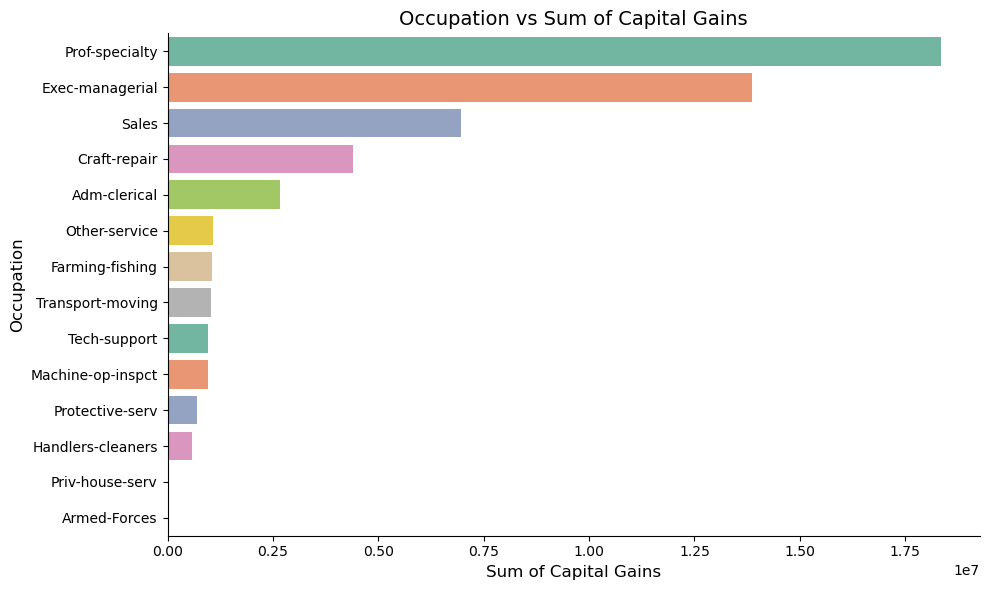

In [20]:
# Calculate the sum of capital gains by occupation and sort the data in descending order
occupation_capital_gain = df.groupby('occupation')['capital-gain'].sum().reset_index()
occupation_capital_gain = occupation_capital_gain.sort_values('capital-gain', ascending=False)

# Create the bar plot for occupation vs sum of capital gains
plt.figure(figsize=(10, 6))
sns.barplot(x='capital-gain', y='occupation', data=occupation_capital_gain, palette="Set2")
plt.xlabel('Sum of Capital Gains', fontsize=12)
plt.ylabel('Occupation', fontsize=12)
plt.title('Occupation vs Sum of Capital Gains', fontsize=14)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine()

plt.tight_layout()
plt.show()

`Occupation`: *Prof-specialty* and *Exec-managerial* have noticeably higher `capital-gain`. Lets evaluate the remaining demographic attributes to income.

In [21]:
# Select the relevant demographic attributes and the target variable (income)
demographic_attributes = ['age', 'education', 'occupation', 'marital-status', 'educational-num', 'gender']
df_demographic = df[demographic_attributes + ['income']]

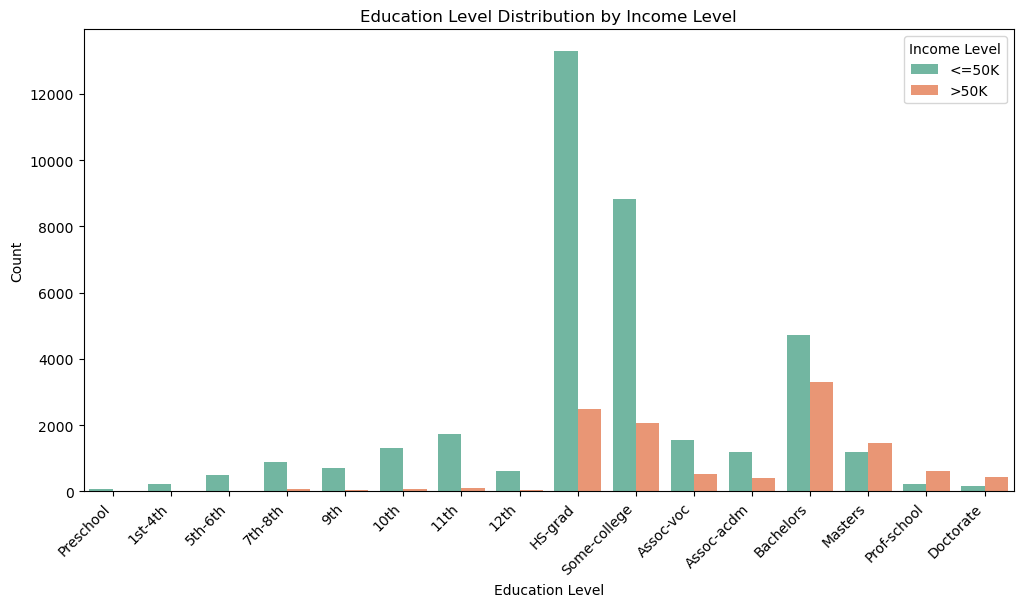

In [22]:
# Analyze education level distribution by income using bar plots
plt.figure(figsize=(12, 6))
education_order = df_demographic.groupby('education')['educational-num'].mean().sort_values().index
sns.countplot(x='education', hue='income', data=df_demographic, order=education_order, palette="Set2")
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Level Distribution by Income Level')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Income Level', loc='upper right')
plt.show()

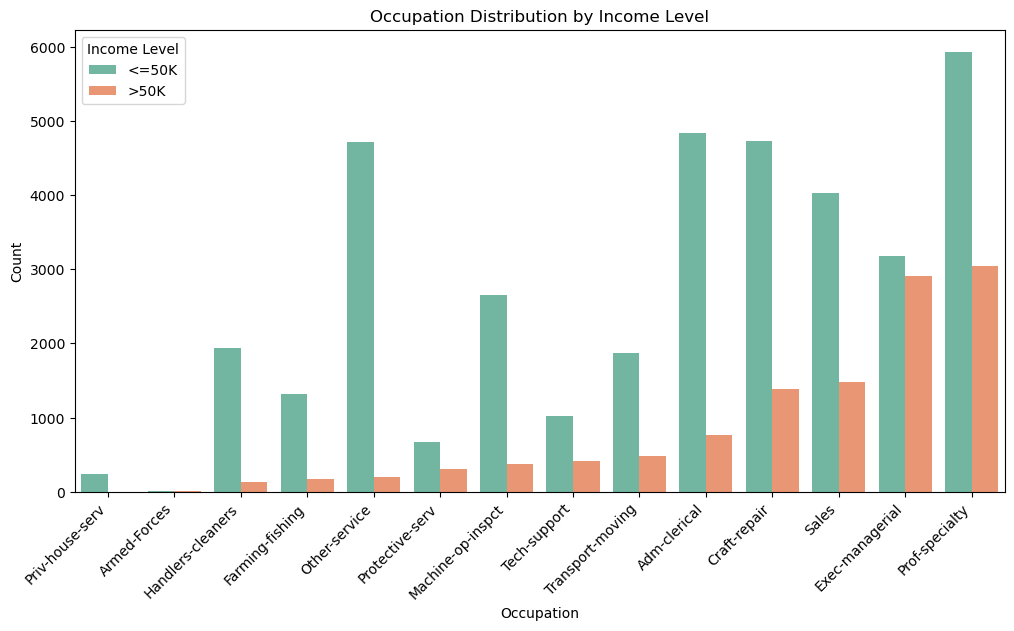

In [23]:
# Analyze occupation distribution by income using bar plots
plt.figure(figsize=(12, 6))
occupation_income = df_demographic[df_demographic['income'] == '>50K']['occupation'].value_counts().reset_index()
occupation_income.columns = ['occupation', 'count']
occupation_income = occupation_income.sort_values('count')
sns.countplot(x='occupation', hue='income', data=df_demographic, palette="Set2", order=occupation_income['occupation'])
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Occupation Distribution by Income Level')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Income Level', loc='upper left')
plt.show()

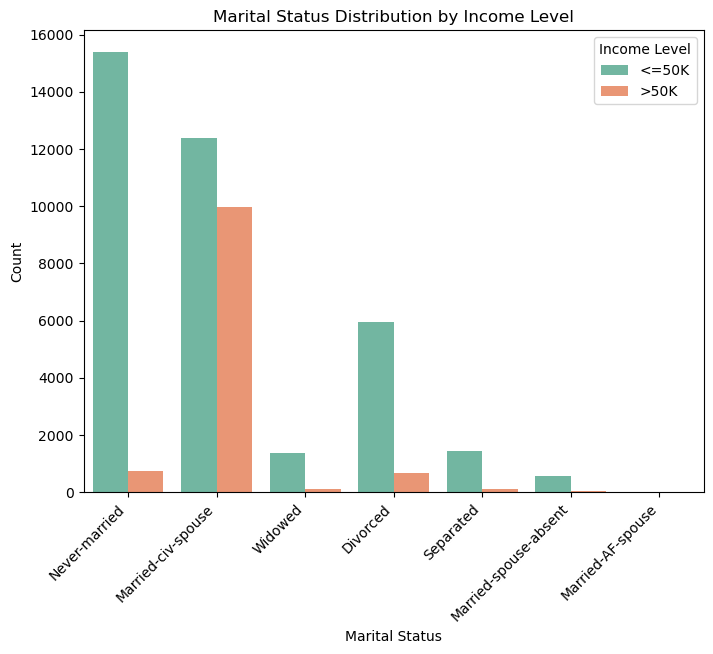

In [24]:
# Analyze marital status distribution by income using bar plots
plt.figure(figsize=(8, 6))
sns.countplot(x='marital-status', hue='income', data=df_demographic, palette="Set2")
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Marital Status Distribution by Income Level')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Income Level', loc='upper right')
plt.show()

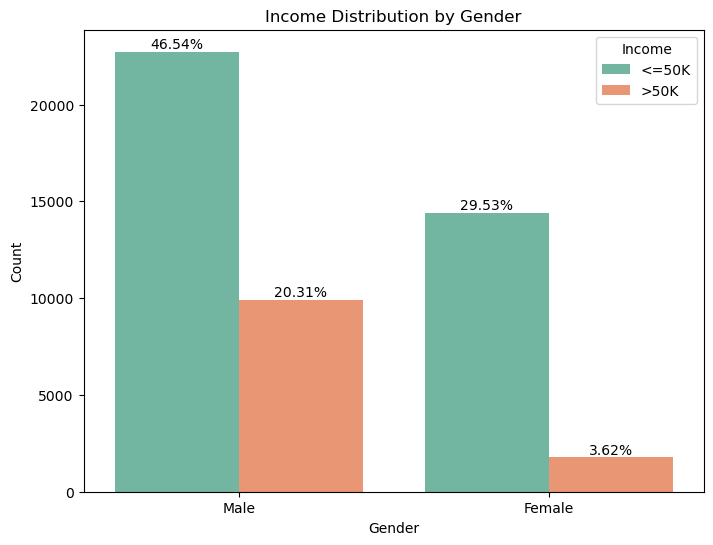

In [25]:
# Plot income distribution by gender using bar plots
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='gender', hue='income', data=df_demographic, palette="Set2")
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Income Distribution by Gender')
plt.legend(title='Income', loc='upper right')

# Calculate income distribution by gender as percentages
gender_income_counts = df_demographic.groupby('gender')['income'].value_counts(normalize=True) * 100

# Iterate over the bars and add percentage labels
total_height = df_demographic.shape[0]
for p in ax.patches:
    percentage = f"{p.get_height() / total_height * 100:.2f}%"
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()


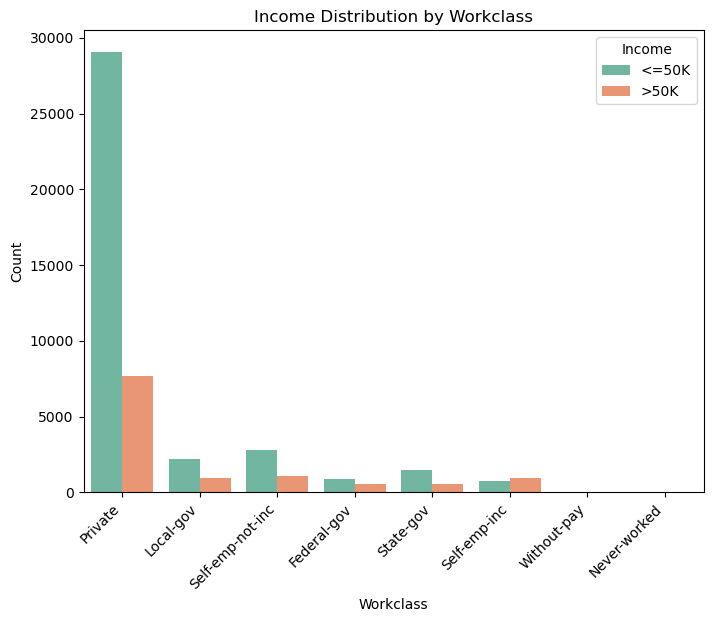

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(x='workclass', hue='income', data=df, palette="Set2")
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.title('Income Distribution by Workclass')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Income', loc='upper right')
plt.show()


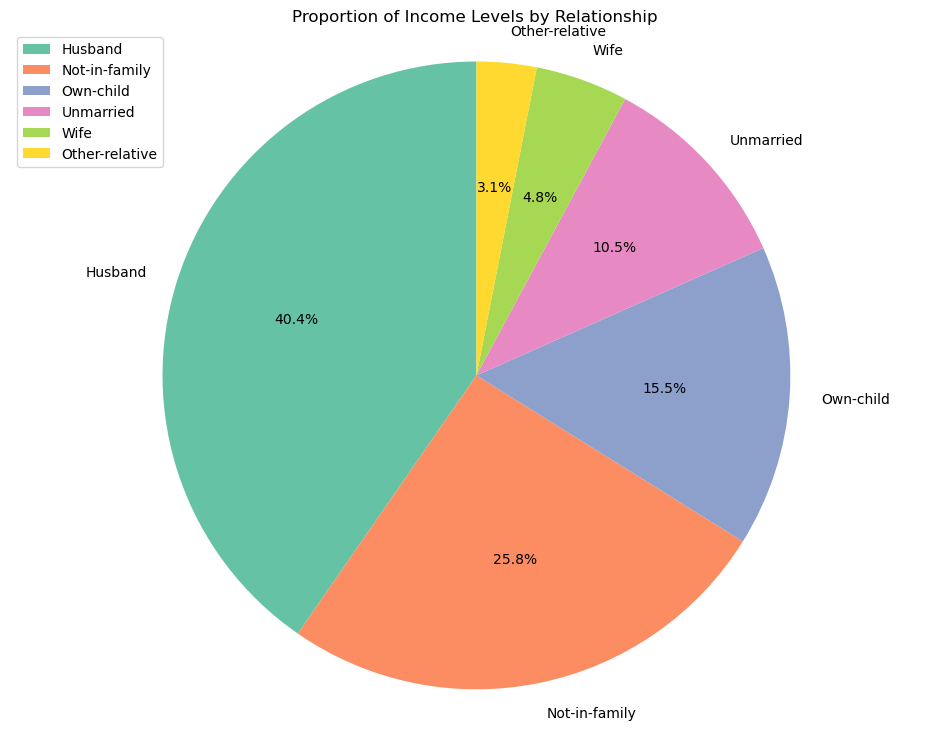

In [27]:
plt.figure(figsize=(12, 9))
df_relationship = df['relationship'].value_counts()
colors = sns.color_palette('Set2')
plt.pie(df_relationship, labels=df_relationship.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Income Levels by Relationship')
plt.legend(loc='upper left')
plt.axis('equal')
plt.show()

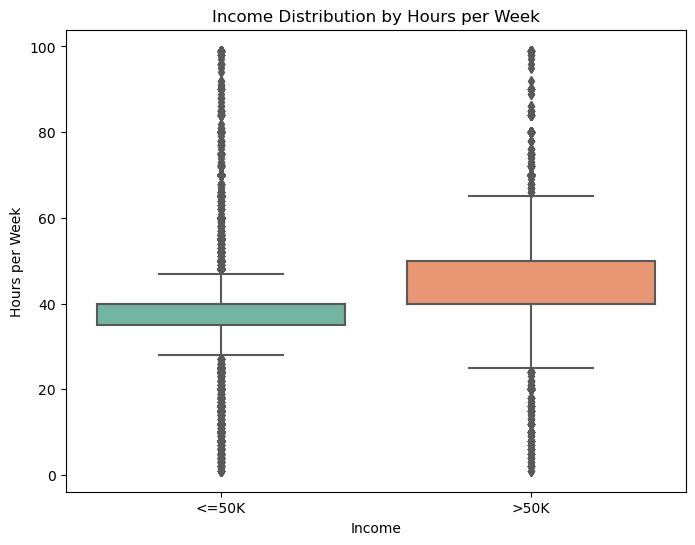

In [28]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='income', y='hours-per-week', data=df, palette="Set2")
plt.xlabel('Income')
plt.ylabel('Hours per Week')
plt.title('Income Distribution by Hours per Week')
plt.show()


## 4. Preprocessing (The Narrative)

In [30]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

In [31]:
# remove the some unnecessary features

del df['fnlwgt']
del df['educational-num']
del df['race']
del df['capital-gain']
del df['capital-loss']

In [32]:
label_encoder = preprocessing.LabelEncoder()

df['gender'] = label_encoder.fit_transform(df['gender'])
df['workclass'] = label_encoder.fit_transform(df['workclass'])
df['education'] = label_encoder.fit_transform(df['education'])
df['marital-status'] = label_encoder.fit_transform(df['marital-status'])
df['occupation'] = label_encoder.fit_transform(df['occupation'])
df['relationship'] = label_encoder.fit_transform(df['relationship'])
df['native-country'] = label_encoder.fit_transform(df['native-country'])
df['income'] = label_encoder.fit_transform(df['income'])

In [33]:
df.head()

,age,workclass,education,marital-status,occupation,relationship,gender,hours-per-week,native-country,income
0,25,3,1,4,6,3,1,40,38,0
1,38,3,11,2,4,0,1,50,38,0
2,28,1,7,2,10,0,1,40,38,1
3,44,3,15,2,6,0,1,40,38,1
4,18,3,15,4,9,3,0,30,38,0


In [34]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X.shape, y.shape

((48842, 9), (48842,))

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [36]:
knn = KNeighborsClassifier(n_neighbors= 15)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [37]:
y_pred = knn.predict(X_test)
knn.score(X_test, y_test)*100

80.39717473641109

In [38]:
new_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
new_df.head()

,Actual,Predicted
7762,0,0
23881,0,0
30507,1,0
28911,0,0
19484,0,1


In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[6627,  852],
       [1063, 1227]], dtype=int64)

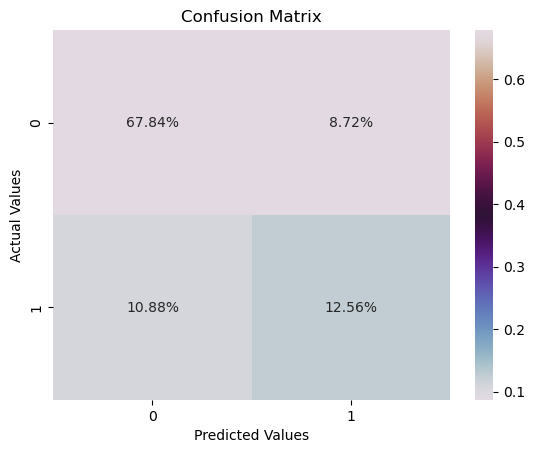

In [40]:
# This normalizes the confusion matrix by dividing each value by the sum of all values in the matrix. This ensures that the heatmap represents proportions or percentages rather than absolute counts.
sns.heatmap(confusion_matrix(y_test, y_pred) / np.sum(confusion_matrix(y_test, y_pred)), annot = True, cmap = 'twilight', fmt = '.2%' );
plt.title('Confusion Matrix')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values");

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      7479
           1       0.59      0.54      0.56      2290

    accuracy                           0.80      9769
   macro avg       0.73      0.71      0.72      9769
weighted avg       0.80      0.80      0.80      9769



In [42]:
accuracy_rate = []
error_rate = []

for i in range (1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(knn, X, y, cv = 12)
    accuracy_rate.append(score.mean())
    error_rate.append(1-score.mean())

Text(0, 0.5, 'Error Rate')

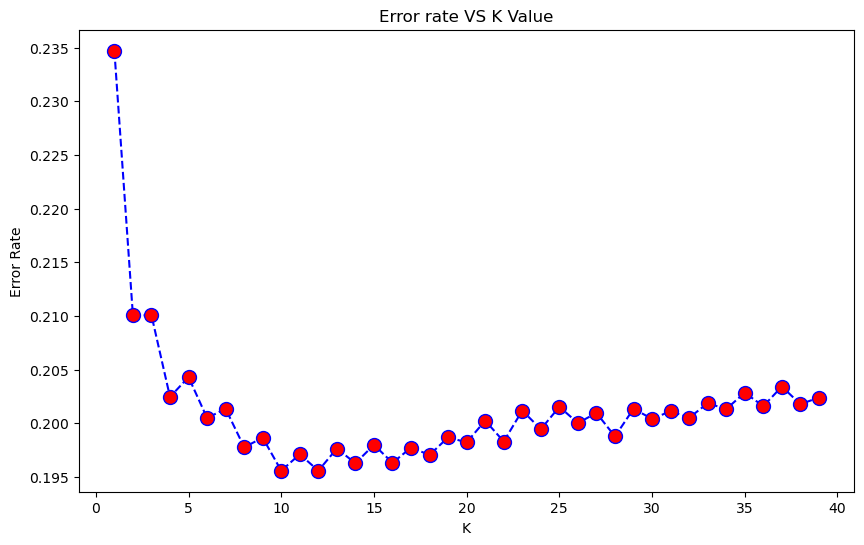

In [43]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

plt.title('Error rate VS K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In this error rate vs K value graph, the best performance K value is 10.

In [44]:
knn = KNeighborsClassifier(n_neighbors = 10)

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('WITH K = 10')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K = 10


[[6800  679]
 [1207 1083]]


              precision    recall  f1-score   support

           0       0.85      0.91      0.88      7479
           1       0.61      0.47      0.53      2290

    accuracy                           0.81      9769
   macro avg       0.73      0.69      0.71      9769
weighted avg       0.79      0.81      0.80      9769



The importance score represents the relative importance of a feature in predicting the target variable. It indicates the contribution or impact of a feature towards the performance of a machine learning model.

I will be using permutation importance, which is commonly used for feature importance analysis. The importance score is calculated by measuring the drop in model performance when a feature's values are randomly permuted while keeping other features constant. A higher importance score suggests that the feature has a stronger influence on the model's predictions.

In [45]:
from sklearn.inspection import permutation_importance

baseline_acc = accuracy_score(y_test, knn.predict(X_test))
print("Baseline Accuracy:", baseline_acc)

# Perform permutation importance analysis
result = permutation_importance(knn, X_test, y_test, n_repeats=10, random_state=42)

# Get feature importances and their indices
importances = result.importances_mean
indices = np.argsort(importances)[::-1]

# Print feature importances in descending order
print("Feature Importances:")
for f in range(X.shape[1]):
    print(f"{X.columns[indices[f]]}: {importances[indices[f]]}")

# Evaluate model performance with selected features
selected_features = X.columns[indices[:5]]  # Select top 5 features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

knn_selected = KNeighborsClassifier(n_neighbors = 10)
knn_selected.fit(X_train_selected, y_train)

# Evaluate selected model's accuracy
selected_acc = accuracy_score(y_test, knn_selected.predict(X_test_selected))
print("Selected Features Accuracy:", selected_acc)

Baseline Accuracy: 0.8069403214249156
Feature Importances:
age: 0.03245982188555635
hours-per-week: 0.022315487767427578
marital-status: 0.021046166444876658
occupation: 0.020687890265124388
education: 0.02052410686866618
relationship: 0.009120687890265123
workclass: 0.002538642645101863
native-country: 0.0019858736820554945
gender: 0.00015354693417956032
Selected Features Accuracy: 0.8116490940730884


**Conclusion: **

The model predicts adult income based on various features. I have ranked the features by their importance, which means how much they contribute to the accuracy of the model. The most important feature is age, followed by hours-per-week, marital-status, occupation, education, relationship, workclass, native-country and gender. The table below shows the numerical values of the feature importances*.

| Feature        | Importance     |
| -------------- | -------------- |
| age            | 0.032459821886 |
| hours-per-week | 0.022315487767 |
| marital-status | 0.021046166445 |
| occupation     | 0.020687890265 |
| education      | 0.020524106869 |
| relationship   | 0.009120687890 |
| workclass      | 0.002538642645 |
| native-country | 0.001985873682 |
| gender         | 0.000153546934 |


_*It is important to note that the importance score is a relative measure within the context of the specific model and dataset. It does not necessarily reflect the absolute importance of a feature or imply causality. Feature importance is a useful tool for understanding the relative importance of different features in a model but should be interpreted with caution and in the context of the specific problem domain._